In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


2022-11-21 22:17:20.200518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-21 22:17:21.318597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-21 22:17:21.318646: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-21 22:17:21.459952: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-21 22:17:24.446150: W tensorflow/stream_executor/platform/de

In [2]:
train_dir = './train'
test_dir = './test'

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-11-21 22:21:22.068339: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-21 22:21:22.068677: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-21 22:21:22.068899: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-21 22:21:22.069213: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-21 22:21:22.069327: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [4]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

## Question 1
Since we have a binary classification problem, what is the best loss function for us?

**binary crossentropy**

## Question 2
What's the total number of parameters of the model? You can use the summary method for that.

`Total params: 11,215,873`

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    shuffle = True)

Found 1594 images belonging to 2 classes.


In [9]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size=(150, 150),
                                                batch_size=20,
                                                class_mode='binary',
                                                shuffle = True)

Found 394 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
80/80 [==============================] - 29s 342ms/step - loss: 0.6132 - acc: 0.6788 - val_loss: 0.5004 - val_acc: 0.8147
Epoch 2/10
80/80 [==============================] - 25s 311ms/step - loss: 0.4657 - acc: 0.8080 - val_loss: 0.4063 - val_acc: 0.8401
Epoch 3/10
80/80 [==============================] - 39s 488ms/step - loss: 0.3858 - acc: 0.8432 - val_loss: 0.4902 - val_acc: 0.7563
Epoch 4/10
80/80 [==============================] - 25s 310ms/step - loss: 0.3555 - acc: 0.8444 - val_loss: 0.3389 - val_acc: 0.8528
Epoch 5/10
80/80 [==============================] - 24s 295ms/step - loss: 0.3056 - acc: 0.8789 - val_loss: 0.3454 - val_acc: 0.8553
Epoch 6/10
80/80 [==============================] - 21s 261ms/step - loss: 0.2758 - acc: 0.8952 - val_loss: 0.3800 - val_acc: 0.8173
Epoch 7/10
80/80 [==============================] - 19s 237ms/step - loss: 0.2477 - acc: 0.9109 - val_loss: 0.2987 - val_acc: 0.8807
Epoch 8/10
80/80 [==============================] - 19s 231ms/step - 

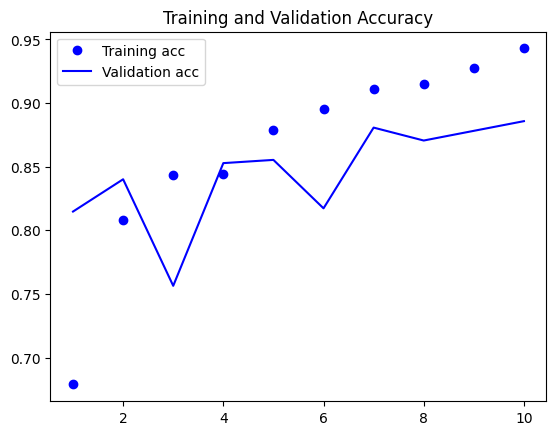

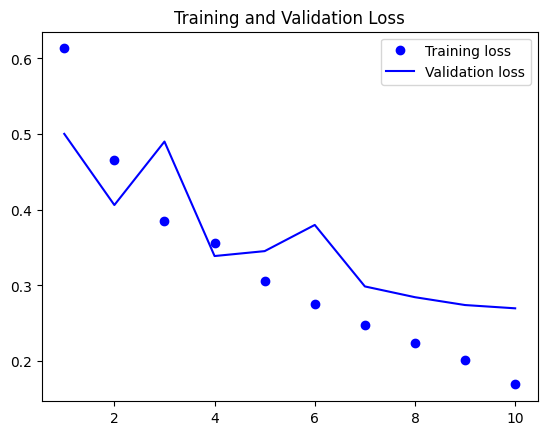

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Question 3

What is the median of training accuracy for all the epochs for this model?

$0.88 \approx 0.9$

In [13]:
acc_median = np.median(acc)
acc_median

0.8870765566825867

## Question 4

What is the standard deviation of training loss for all the epochs for this model?

**0.13**

In [14]:
loss_std = np.std(loss)
loss_std

0.1289032904232223

In [15]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


In [21]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
50/50 [==============================] - 30s 573ms/step - loss: 0.4625 - acc: 0.7811 - val_loss: 0.4909 - val_acc: 0.7766
Epoch 2/10
50/50 [==============================] - 39s 774ms/step - loss: 0.4307 - acc: 0.7974 - val_loss: 0.4068 - val_acc: 0.8173
Epoch 3/10
50/50 [==============================] - 82s 2s/step - loss: 0.4108 - acc: 0.8030 - val_loss: 0.5813 - val_acc: 0.7386
Epoch 4/10
50/50 [==============================] - 37s 740ms/step - loss: 0.3890 - acc: 0.8275 - val_loss: 0.2582 - val_acc: 0.8832
Epoch 5/10
50/50 [==============================] - 48s 956ms/step - loss: 0.3781 - acc: 0.8338 - val_loss: 0.3660 - val_acc: 0.8299
Epoch 6/10
50/50 [==============================] - 58s 1s/step - loss: 0.3864 - acc: 0.8306 - val_loss: 0.3760 - val_acc: 0.8401
Epoch 7/10
50/50 [==============================] - 57s 1s/step - loss: 0.3620 - acc: 0.8482 - val_loss: 0.5220 - val_acc: 0.7716
Epoch 8/10
50/50 [==============================] - 37s 749ms/step - loss: 0.3

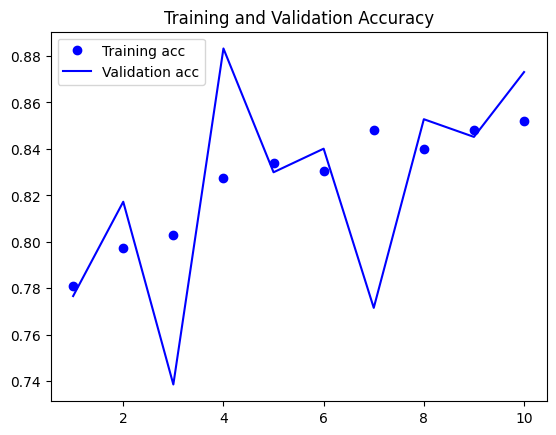

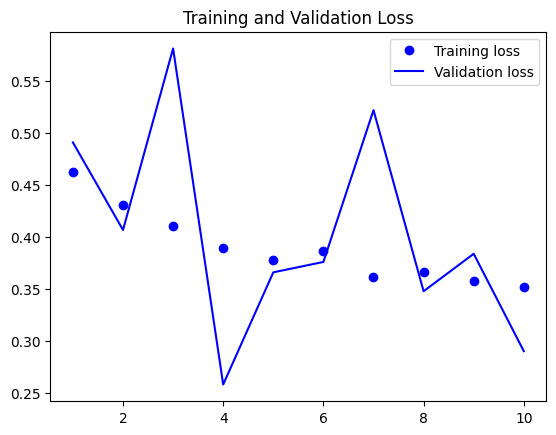

In [22]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?



In [23]:
test_loss_mean = np.mean(val_loss_aug)
test_loss_mean

0.40232536792755125

## Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [24]:
np.mean(val_acc_aug[5:])

0.8365482330322266